In [97]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [98]:
import numpy as np
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

import torch
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
)
import matplotlib.patches as patches
from itertools import cycle
from scipy import special


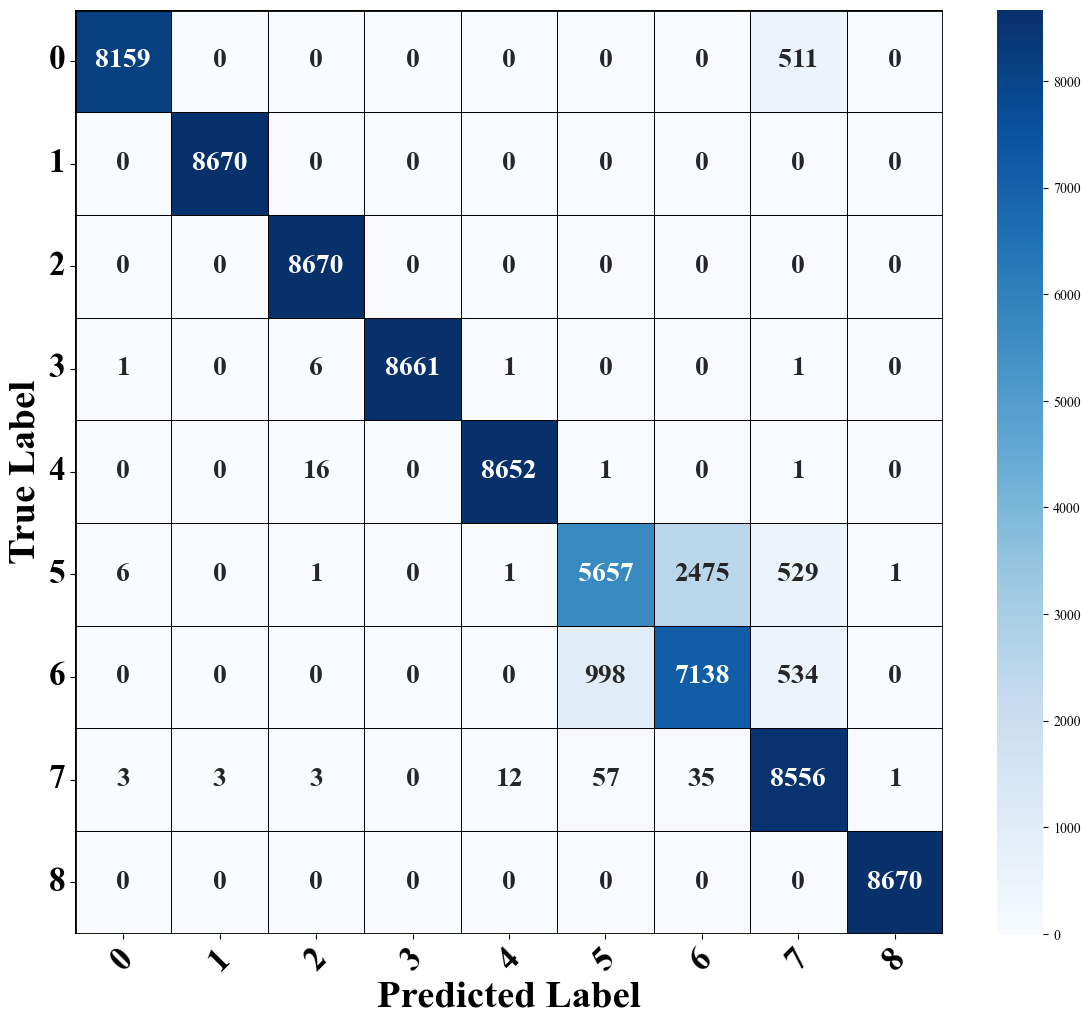

In [99]:
########################################### BATCH 16 ###########################################

# Define paths for data and output
RESULTS_DIR = './results/attention/'
OUTPUT_DIR = './attention_charts/'

num_classes = 9
all_labels = np.load(f'{RESULTS_DIR}all_labels.npy')
all_preds = np.load(f'{RESULTS_DIR}all_preds.npy')
all_probs = np.load(f'{RESULTS_DIR}all_probs.npy')

conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot using Seaborn
plt.figure(figsize=(14, 12))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black', annot_kws={"size": 20, "weight": "bold"})

# Add border to all four corners
ax.add_patch(patches.Rectangle((0, 0), num_classes, num_classes, fill=False, edgecolor='black', lw=2))

# Customize labels
plt.xticks(np.arange(num_classes) + 0.5, range(num_classes), rotation=45, fontsize=24, fontweight='bold')
plt.yticks(np.arange(num_classes) + 0.5, range(num_classes), rotation=0, fontsize=24, fontweight='bold')
plt.ylabel('True Label', fontsize=28, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=28, fontweight='bold')


# Save the plot
plt.savefig(f'{OUTPUT_DIR}confusion_matrix.pdf', format='pdf', bbox_inches='tight')
plt.savefig(f'{OUTPUT_DIR}confusion_matrix.png', format='png', bbox_inches='tight', dpi=300)



# Show the plot
plt.show()

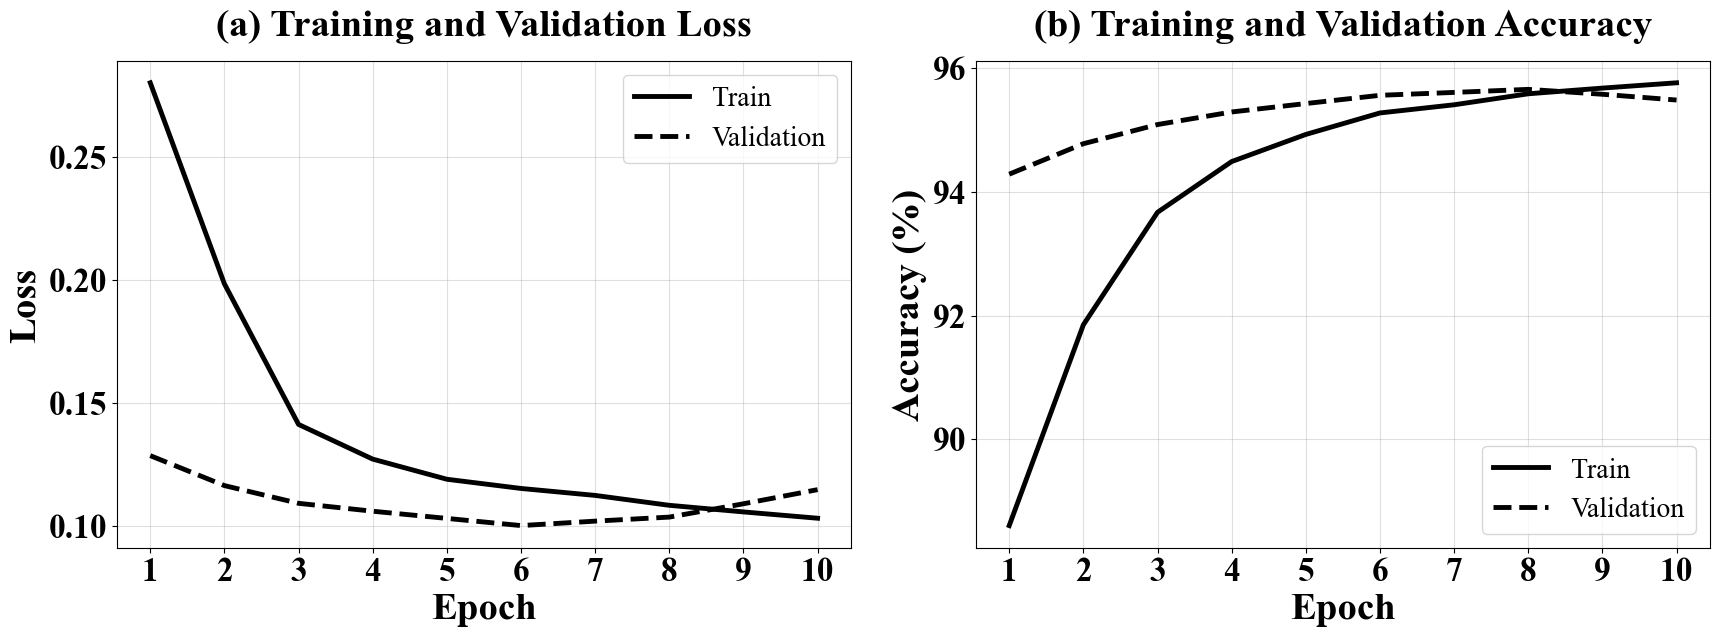

In [100]:
import numpy as np
import matplotlib.pyplot as plt

train_loss_history = np.load(f'{RESULTS_DIR}train_loss_history.npy')
val_loss_history = np.load(f'{RESULTS_DIR}val_loss_history.npy')
train_acc_history = np.load(f'{RESULTS_DIR}train_acc_history.npy')
val_acc_history = np.load(f'{RESULTS_DIR}val_acc_history.npy')

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# (a) Training and Validation Loss
ax1.plot(range(1, 11), train_loss_history, label='Train', linestyle='-', color='black', linewidth=3.5)
ax1.plot(range(1, 11), val_loss_history, label='Validation', linestyle='--', color='black', linewidth=3.5)
ax1.set_xlabel('Epoch', fontsize=28, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=28, fontweight='bold')
ax1.set_xticks(range(1, 11))
ax1.tick_params(axis='both', labelsize=24)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
ax1.legend(fontsize=20)
ax1.set_title('(a) Training and Validation Loss', fontsize=28, fontweight='bold', pad=18)
ax1.grid(True, alpha=0.4)

# (b) Training and Validation Accuracy
ax2.plot(range(1, 11), train_acc_history, label='Train', linestyle='-', color='black', linewidth=3.5)
ax2.plot(range(1, 11), val_acc_history, label='Validation', linestyle='--', color='black', linewidth=3.5)
ax2.set_xlabel('Epoch', fontsize=28, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=28, fontweight='bold')
ax2.set_xticks(range(1, 11))
ax2.tick_params(axis='both', labelsize=24)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')
ax2.legend(fontsize=20)
ax2.set_title('(b) Training and Validation Accuracy', fontsize=28, fontweight='bold', pad=18)
ax2.grid(True, alpha=0.4)

plt.tight_layout(pad=3.0)


plt.savefig(f'{OUTPUT_DIR}loss_accuracy.pdf', format='pdf', bbox_inches='tight')

plt.savefig(f'{OUTPUT_DIR}loss_accuracy.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

In [101]:
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')

f1 = f1_score(all_labels, all_preds, average='macro')

print(f"Precision: {precision*100:.2f}")
print(f"Recall: {recall*100:.2f}")
print(f"F1 Score: {f1*100:.2f}")
print(f"Accuracy: {accuracy*100:.2f}")

Precision: 93.56
Recall: 93.34
F1 Score: 93.22
Accuracy: 93.34


In [102]:
classes = [
    'BPSK', 'QPSK', '8PSK', '16QAM', '64QAM', 'AM-DSB-SC', 'AM-SSB-SC', 'FM', 'GMSK'
]

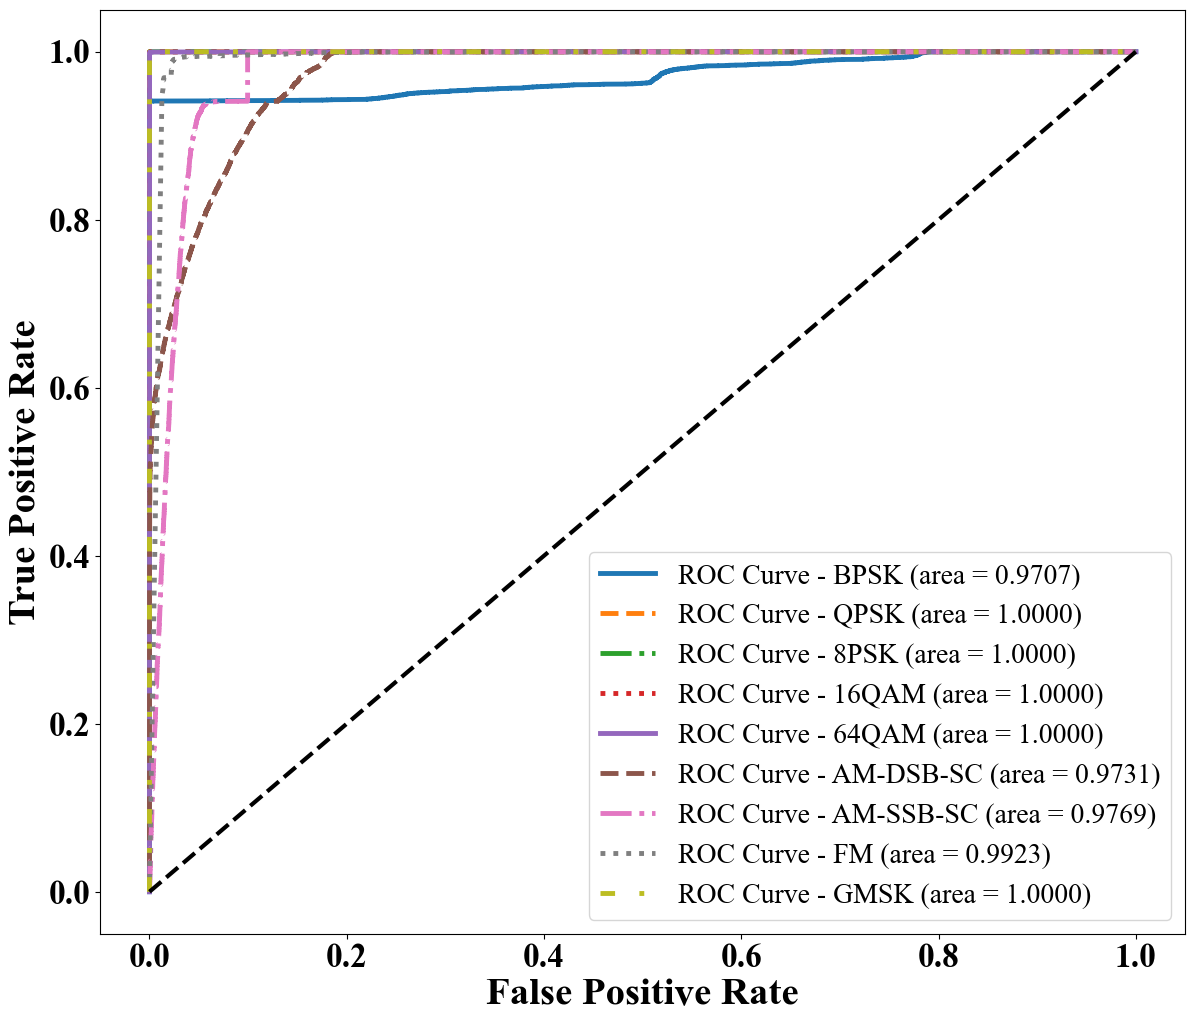

In [103]:
fpr  = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels == i, all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

line_styles = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted', (0, (3, 5, 1, 5))]
plt.figure(figsize=(14, 12))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=3.5,
             label=f'ROC Curve - {classes[i]} (area = {roc_auc[i]:.4f})',linestyle=line_styles[i % len(line_styles)])
    
plt.plot([0, 1], [0, 1], 'k--', lw=3)
ax = plt.gca()
ax.tick_params(axis='both', labelsize=24)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

plt.xlabel('False Positive Rate', fontsize=28, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=28, fontweight='bold')
# plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right", fontsize=20)
plt.savefig(f'{OUTPUT_DIR}roc_curve.pdf', format='pdf', bbox_inches='tight')
plt.savefig(f'{OUTPUT_DIR}roc_curve.png', format='png', bbox_inches='tight', dpi=300)

plt.show()

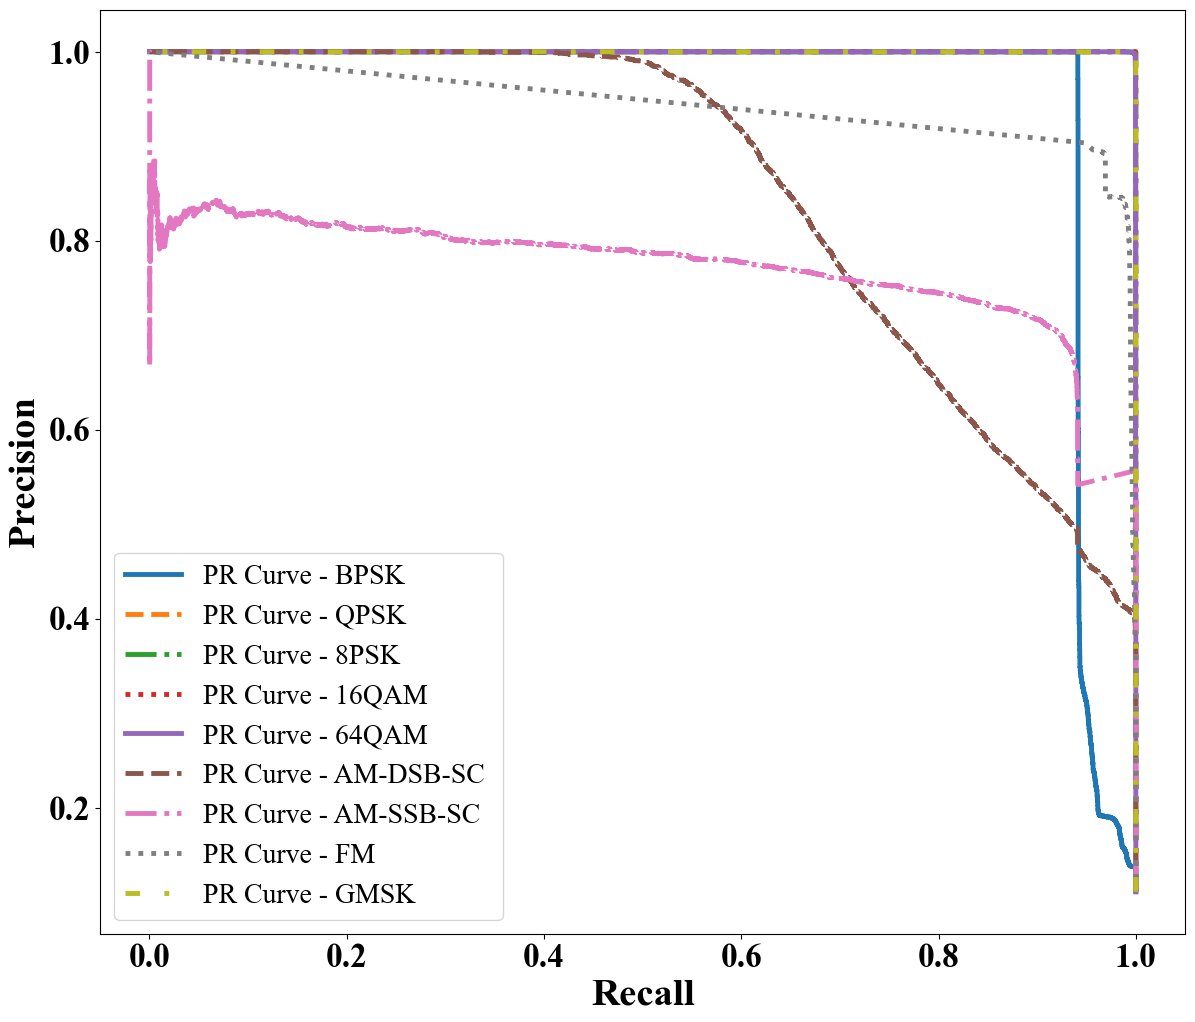

In [104]:
# precision-recall curve
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(all_labels == i, all_probs[:, i])
    average_precision[i] = np.average(precision[i])

line_styles = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted', (0, (3, 5, 1, 5))]


plt.figure(figsize=(14, 12))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], lw=3.5,label=f'PR Curve - {classes[i]} ', linestyle=line_styles[i % len(line_styles)])

ax = plt.gca()
ax.tick_params(axis='both', labelsize=24)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=28, fontweight='bold')
plt.ylabel('Precision', fontsize=28, fontweight='bold')
plt.legend(loc="lower left", fontsize=20)
# plt.title('Precision-Recall Curve')

plt.savefig(f'{OUTPUT_DIR}precision_recall_curve.pdf', format='pdf', bbox_inches='tight')

plt.savefig(f'{OUTPUT_DIR}precision_recall_curve.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

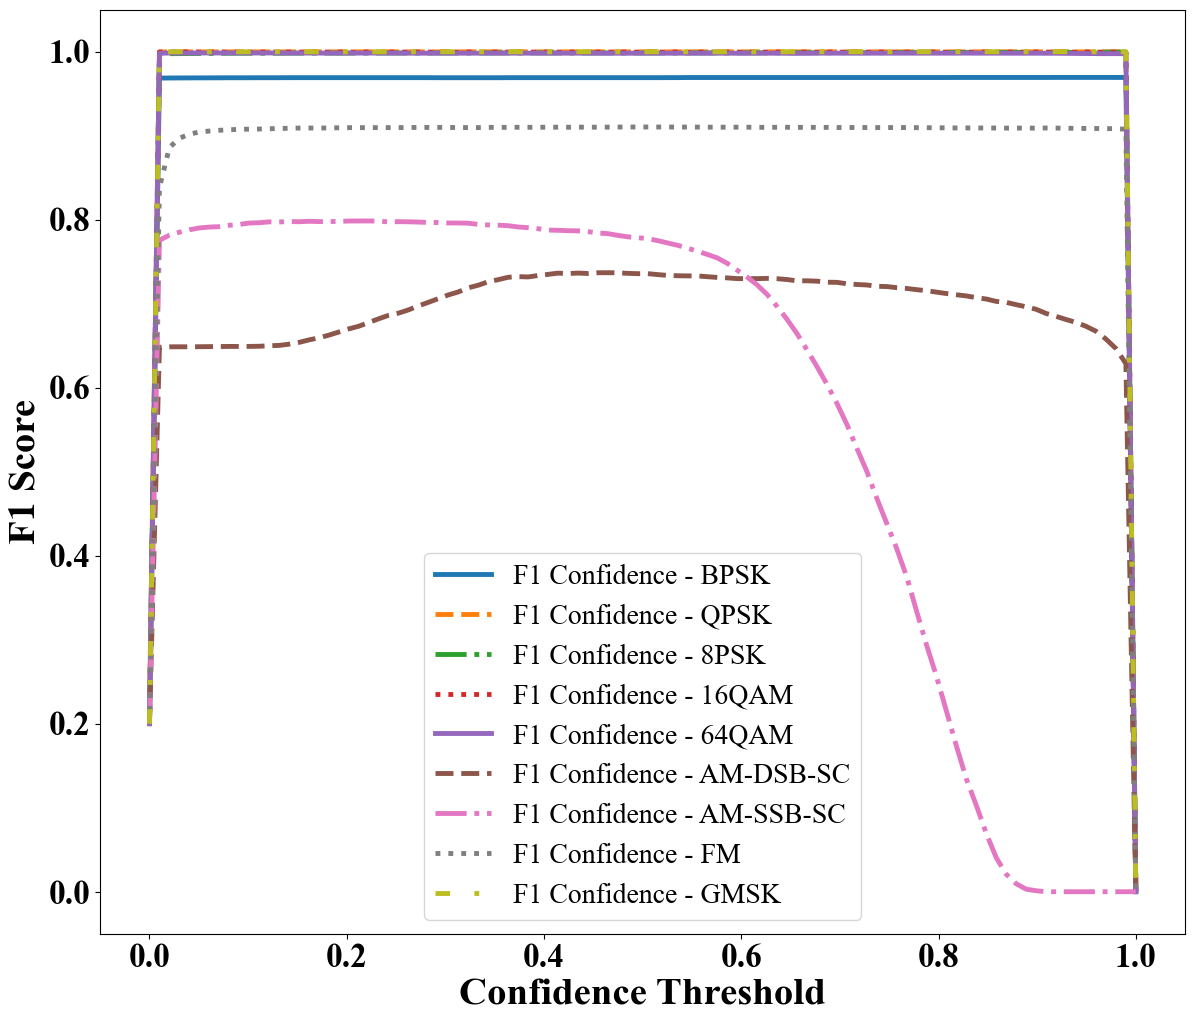

In [105]:
# f1 score vs confidence threshold
from sklearn.metrics import f1_score

thresholds = np.linspace(0, 1, 100)
f1_scores = np.zeros((num_classes, len(thresholds)))

for i, threshold in enumerate(thresholds):
    for j in range(num_classes):
        preds = all_probs[:, j] > threshold
        f1_scores[j, i] = f1_score(all_labels == j, preds)

line_styles = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted', (0, (3, 5, 1, 5))]


plt.figure(figsize=(14, 12))
for i in range(num_classes):
    plt.plot(thresholds, f1_scores[i], label=f'F1 Confidence - {classes[i]}', linestyle=line_styles[i % len(line_styles)], lw=3.5)
ax = plt.gca()
ax.tick_params(axis='both', labelsize=24)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
plt.legend(loc="best", fontsize=20)
plt.xlabel('Confidence Threshold', fontsize=28, fontweight='bold')
plt.ylabel('F1 Score', fontsize=28, fontweight='bold')

plt.savefig(f'{OUTPUT_DIR}f1_score.pdf', format='pdf', bbox_inches='tight')

plt.savefig(f'{OUTPUT_DIR}f1_score.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

In [106]:
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')

f1 = f1_score(all_labels, all_preds, average='macro')

print(f"Precision: {precision*100:.2f}")
print(f"Recall: {recall*100:.2f}")
print(f"F1 Score: {f1*100:.2f}")
print(f"Accuracy: {accuracy*100:.2f}")

Precision: 93.56
Recall: 93.34
F1 Score: 93.22
Accuracy: 93.34


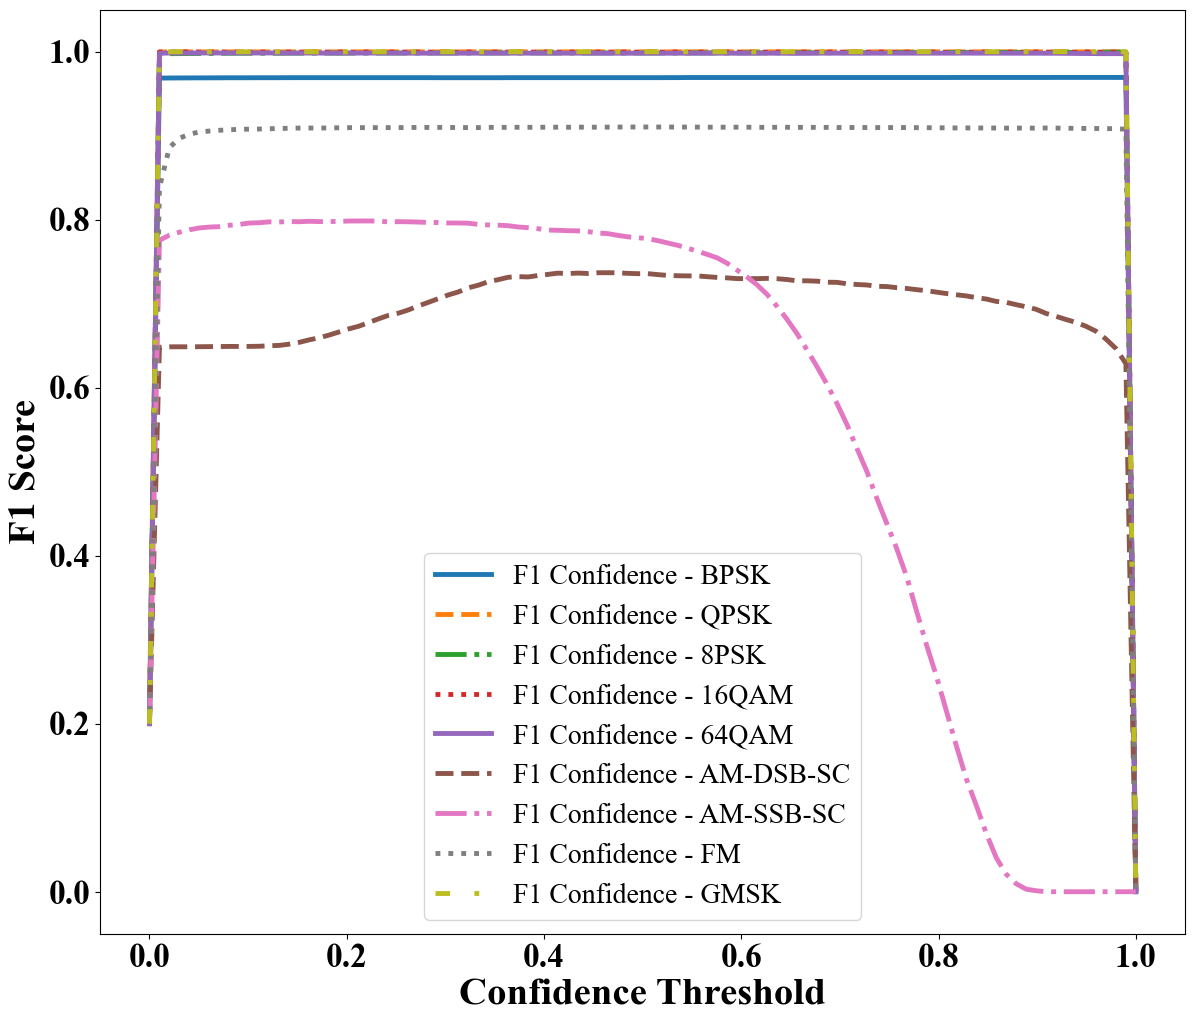

In [107]:
# # f1 score vs confidence threshold
# from sklearn.metrics import f1_score

# thresholds = np.linspace(0, 1, 100)
# f1_scores = np.zeros((num_classes, len(thresholds)))

# for i, threshold in enumerate(thresholds):
#     for j in range(num_classes):
#         preds = all_probs[:, j] > threshold
#         f1_scores[j, i] = f1_score(all_labels == j, preds)

# plt.figure(figsize=(10, 8))
# for i in range(num_classes):
#     plt.plot(thresholds, f1_scores[i], label=f'F1 Confidence - {classes[i]}')
#     plt.legend(loc="best", fontsize=12)
#     plt.xlabel('Confidence Threshold')
#     plt.ylabel('F1 Score')
#     plt.savefig('./visualization/f1_score_b32.pdf', format='pdf', bbox_inches='tight')
# plt.show()

thresholds = np.linspace(0, 1, 100)
f1_scores = np.zeros((num_classes, len(thresholds)))

for i, threshold in enumerate(thresholds):
    for j in range(num_classes):
        preds = all_probs[:, j] > threshold
        f1_scores[j, i] = f1_score(all_labels == j, preds)

# Define 9 different line styles
line_styles = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted', (0, (3, 5, 1, 5))]

plt.figure(figsize=(14, 12))
for i in range(num_classes):
    plt.plot(thresholds, f1_scores[i], label=f'F1 Confidence - {classes[i]}', linestyle=line_styles[i % len(line_styles)], lw=3.5)

ax = plt.gca()
ax.tick_params(axis='both', labelsize=24)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
plt.legend(loc="best", fontsize=20)
plt.xlabel('Confidence Threshold', fontsize=28, fontweight='bold')
plt.ylabel('F1 Score', fontsize=28, fontweight='bold')

plt.savefig(f'{OUTPUT_DIR}f1_score_alt.pdf', format='pdf', bbox_inches='tight')

plt.savefig(f'{OUTPUT_DIR}f1_score_alt.png', format='png', bbox_inches='tight', dpi=300)
plt.show()